In [1]:
import glob as glob
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.offsetbox import AnchoredText

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
CMAP = plt.cm.plasma
CMAP_R = plt.cm.plasma_r
COLORS = [CMAP(i / 4.0) for i in range(5)]

In [4]:
COLOR_0 = COLORS[0]
COLOR_1 = COLORS[1]
COLOR_2 = COLORS[2]
COLOR_3 = COLORS[3]

In [5]:
TEXTWIDTH = 3.25063
FONTSIZE = 6

In [6]:
def setup():
    matplotlib.rcParams.update({"font.size": FONTSIZE})  # controls default text sizes
    matplotlib.rcParams.update({"axes.titlesize": FONTSIZE})  # fontsize of the axes title
    matplotlib.rcParams.update({"axes.labelsize": FONTSIZE})  # fontsize of the x and y labels
    matplotlib.rcParams.update({"axes.formatter.use_mathtext": True})  # use scientific notation for axes with pretty formatting
    matplotlib.rcParams.update({"axes.formatter.useoffset": True}) #
    matplotlib.rcParams.update({"axes.formatter.limits": [0, 0]})  
    matplotlib.rcParams.update({"xtick.labelsize": FONTSIZE})  # fontsize of the tick labels
    matplotlib.rcParams.update({"ytick.labelsize": FONTSIZE})  # fontsize of the tick labels
    matplotlib.rcParams.update({"legend.fontsize": FONTSIZE})  # legend fontsize
    matplotlib.rcParams.update({"figure.titlesize": FONTSIZE})  # fontsize of the figure title

In [7]:
setup()

In [8]:
def load_precisions(filenames):
    filenames = sorted(filenames)
    scaler = MinMaxScaler()
    precisions = []
    unscaled_prec = [np.loadtxt(file) for file in filenames]
    for i in range(len(unscaled_prec)):
        prec = np.abs(unscaled_prec[i])
        prec = scaler.fit_transform(prec.reshape(-1,1)).ravel()
        precisions.append(prec)
    return precisions
    

# Amazon

## RFF

In [9]:
rff_precisions = load_precisions(glob.glob("../../eval/benchmarks/rffnet/amazon/precisions/precisions.txt"))[0]

In [10]:
x = np.arange(1, rff_precisions.shape[0] +1)
x_labels = []

In [11]:
features = np.load("../../data/splitted/amazon/features.npy", allow_pickle=True)

In [12]:
n_words = 10

In [13]:
lower = np.argsort(rff_precisions)[:n_words]
higher = np.argsort(rff_precisions)[-n_words:]

In [14]:
features[lower]

array(['staff', 'pita', 'stew', 'class', 'drag', 'lace', 'runner', 'path',
       'creativ', 'bouillon'], dtype=object)

In [15]:
x_rff = np.append(features[lower], features[higher])
y_rff = np.append(rff_precisions[lower], rff_precisions[higher])

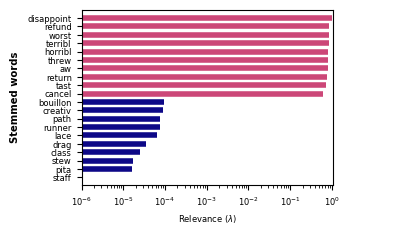

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH, TEXTWIDTH*0.7))
ax.hlines(np.array(range(len(features[higher]))) + n_words, 0, rff_precisions[higher], color=COLOR_2, linewidth=4)
ax.hlines(np.array(range(len(features[lower]))) , 0, rff_precisions[lower], color=COLOR_0, linewidth=4)
# ax.hlines(np.array(range(len(features[higher]))), 0, rff_precisions[higher], color=COLOR_0, linewidth=4, label="RFFNet")
#ax.hlines(np.array(range(len(x_xgb)))-0.25, 0, y_xgb, color=COLOR_3, linewidth=4, label="XGB")
ax.set_xscale("log")
ax.set_yticks(np.array(range(len(x_rff))), x_rff)
#ax.set_yticks(np.array(range(len(features[higher]))), features[higher])
ax.set_xlabel("Relevance ($\lambda$)")
ax.set_xlim(1e-6, 1.1)
fig.supylabel("Stemmed words", x=-9.5e-2, fontweight="bold")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(1.07, 0.9), frameon=False )
plt.savefig("../amazon/rffnet_relevances.pdf", bbox_inches="tight")
plt.show()

## XGB

In [17]:
xgb_precisions = load_precisions(glob.glob("../../eval/benchmarks/xgb/amazon/precisions/precisions.txt"))[0]

In [18]:
x = np.arange(1, xgb_precisions.shape[0] +1)
x_labels = []

In [19]:
features = np.load("../../data/splitted/amazon/features.npy", allow_pickle=True)

In [20]:
n_words = 10

In [21]:
lower = np.argsort(xgb_precisions)[:n_words]
higher = np.argsort(xgb_precisions)[-n_words:]

In [22]:
features[lower]

array(['zuke', 'notch', 'notifi', 'nougat', 'nourish', 'novel', 'novelti',
       'novemb', 'now', 'nowaday'], dtype=object)

In [23]:
x_rff = np.append(features[lower], features[higher])
y_rff = np.append(xgb_precisions[lower], xgb_precisions[higher])

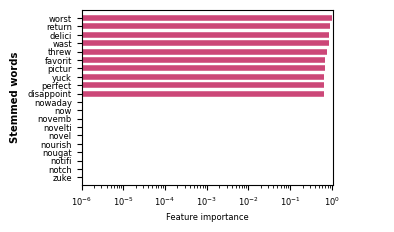

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH, TEXTWIDTH*0.7))
ax.hlines(np.array(range(len(features[higher]))) + n_words, 0, xgb_precisions[higher], color=COLOR_2, linewidth=4)
ax.hlines(np.array(range(len(features[lower]))) , 0, xgb_precisions[lower], color=COLOR_0, linewidth=4)
# ax.hlines(np.array(range(len(features[higher]))), 0, rff_precisions[higher], color=COLOR_0, linewidth=4, label="RFFNet")
#ax.hlines(np.array(range(len(x_xgb)))-0.25, 0, y_xgb, color=COLOR_3, linewidth=4, label="XGB")
ax.set_xscale("log")
ax.set_yticks(np.array(range(len(x_rff))), x_rff)
#ax.set_yticks(np.array(range(len(features[higher]))), features[higher])
ax.set_xlabel("Feature importance")
ax.set_xlim(1e-6, 1.1)
fig.supylabel("Stemmed words", x=-9.5e-2, fontweight="bold")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(1.07, 0.9), frameon=False )
plt.savefig("../amazon/xgb_relevances.pdf", bbox_inches="tight")
plt.show()